In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
df=pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [49]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [51]:
df.isnull()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [52]:
df1=df.drop(['customer name','customer e-mail'],axis=1)

In [53]:
df1.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [54]:
label_encoder=LabelEncoder()
df['country_encoded']=label_encoder.fit_transform(df['country'])
df.drop('country',axis=1,inplace=True)

In [55]:
df.head()

,customer name,customer e-mail,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_encoded
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,27
1,Harlan Barnes,eu.dolor@diam.co.uk,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,17
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,1
3,Jade Cunningham,malesuada@dignissim.com,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,41
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,26


In [56]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_encoded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218,102.682000
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744,60.388263
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000,0.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040,52.000000
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390,100.500000
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517,156.000000
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000,210.000000


In [57]:
df = df[['age', 'annual Salary', 'credit card debt', 'net worth', 'country_encoded', 'gender', 'car purchase amount']]
df.head()


,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,27,0,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,17,0,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,1,1,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,41,1,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,26,1,55915.46248


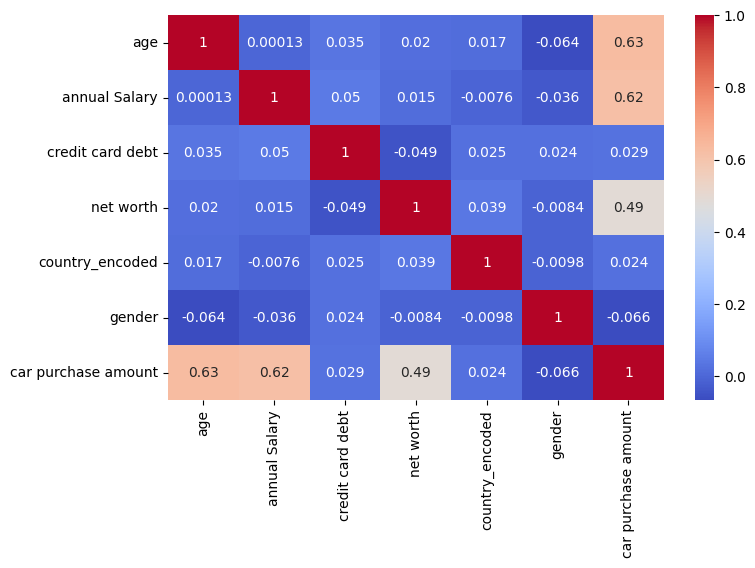

In [58]:
corr_matrix=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

C:\Users\asus\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


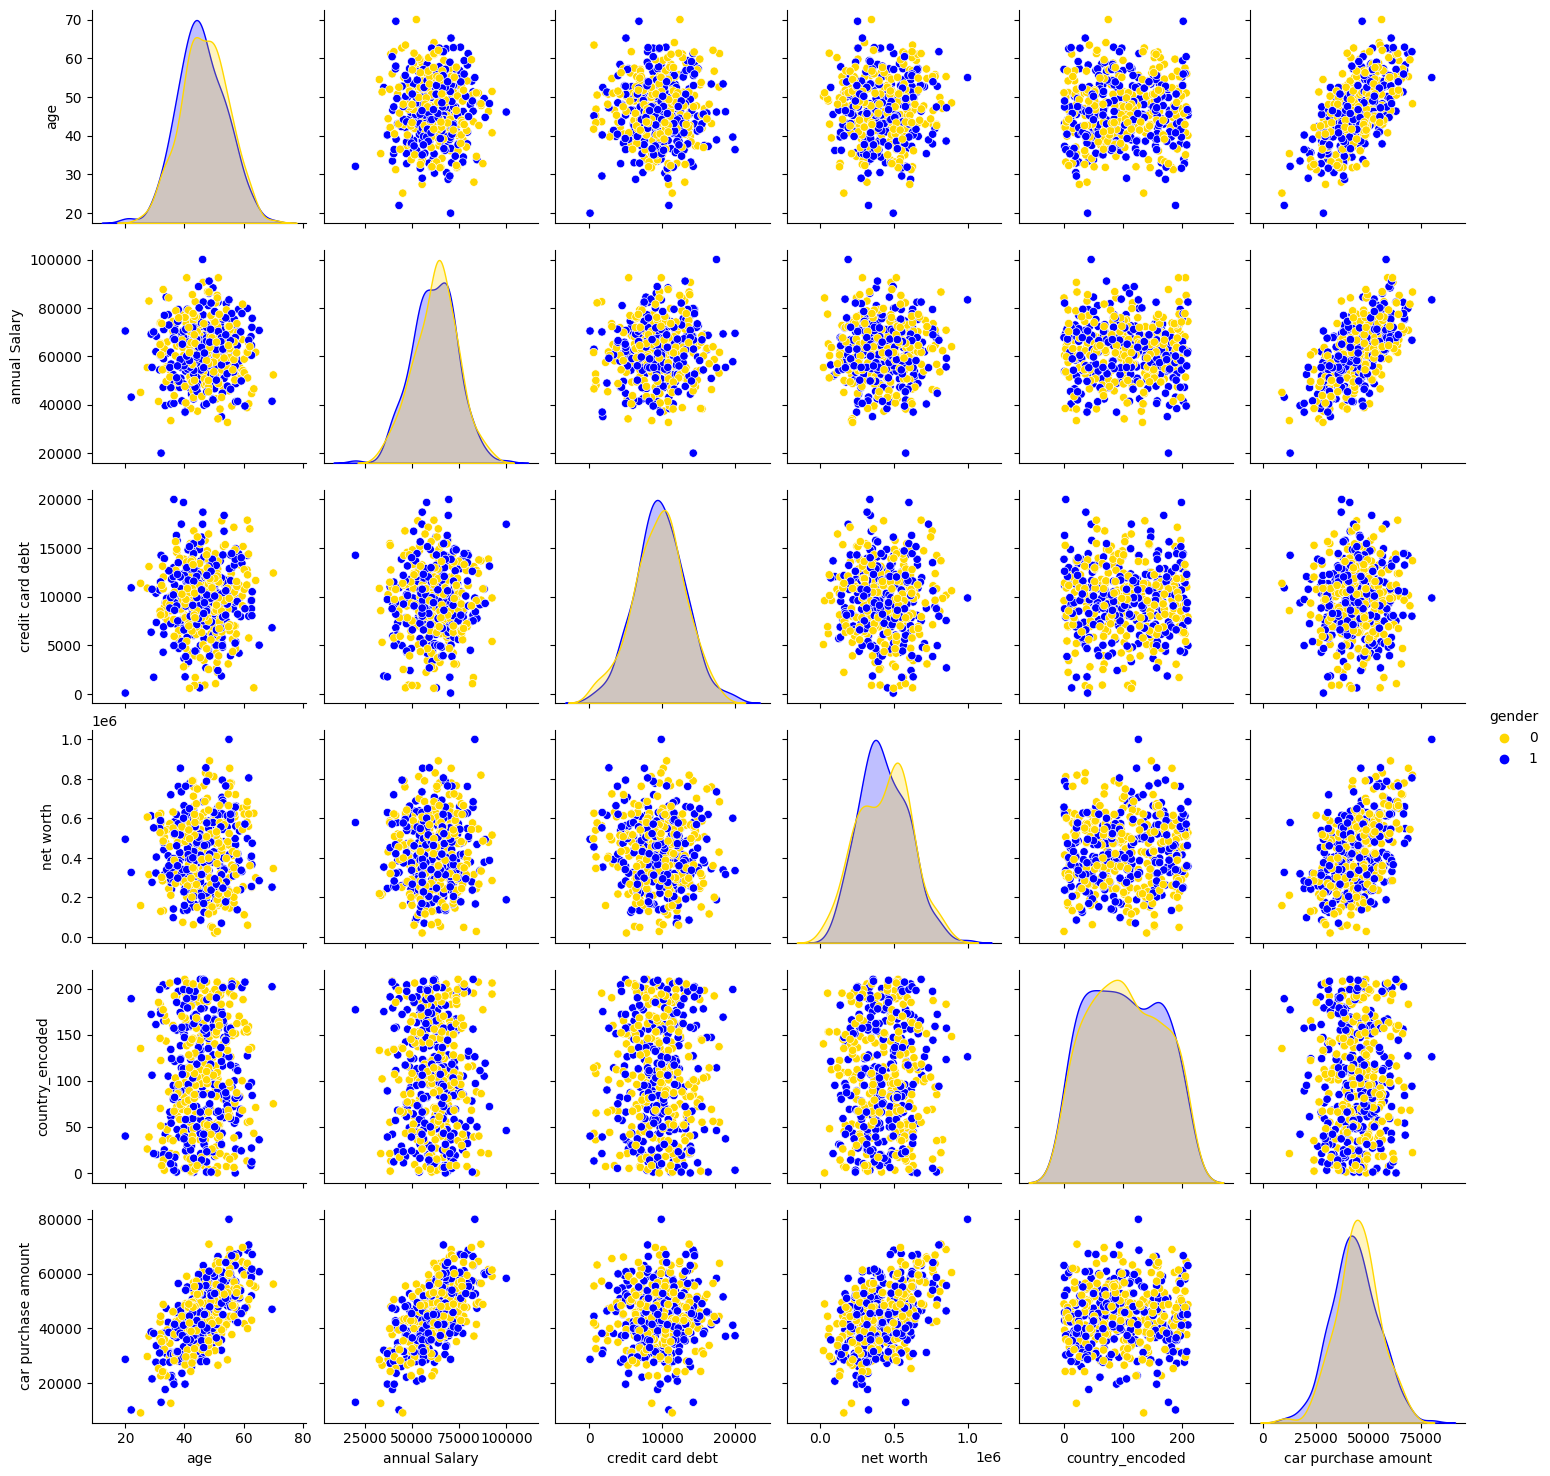

In [66]:
custom_palette = {1: "blue", 0: "gold"}
sns.pairplot(df, hue="gender", palette=custom_palette)
plt.show()

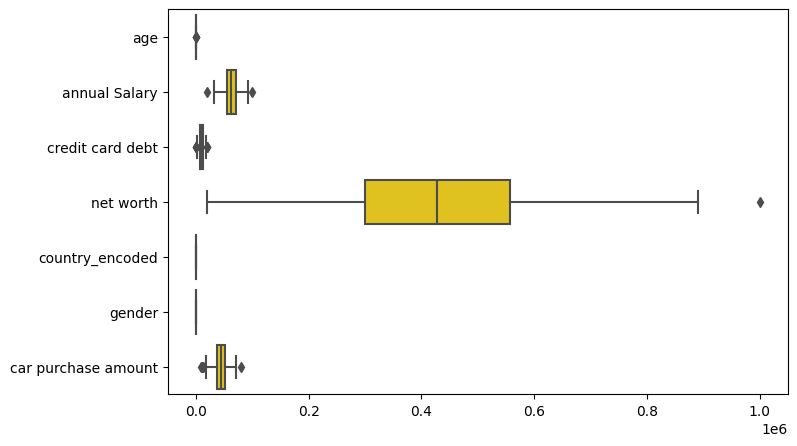

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,orient ='h',color='gold')
plt.show()

In [61]:
df.head()

,age,annual Salary,credit card debt,net worth,country_encoded,gender,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,27,0,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,17,0,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,1,1,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,41,1,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,26,1,55915.46248


In [62]:
Y=df.iloc[:,-1]
X=df.iloc[:,:-1]

# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state =0)

In [64]:
from sklearn.linear_model import LogisticRegression

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [77]:
model = keras.Sequential()
model.add(layers.Input(shape=(6,)))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=1, activation='linear'))  # output layer
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history = model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 51ms/step - loss: 2028873344.0000 - mean_squared_error: 2028873344.0000 - val_loss: 2161048064.0000 - val_mean_squared_error: 2161048064.0000
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 2028852480.0000 - mean_squared_error: 2028852480.0000 - val_loss: 2161027072.0000 - val_mean_squared_error: 2161027072.0000
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 2028831104.0000 - mean_squared_error: 2028831104.0000 - val_loss: 2161004544.0000 - val_mean_squared_error: 2161004544.0000
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 2028808576.0000 - mean_squared_error: 2028808576.0000 - val_loss: 2160979968.0000 - val_mean_squared_error: 2160979968.0000
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 2028783872.0000 - mean_squared_error: 2028783872.0000 - val_loss: 2160952064.0000 - val_mean_squared_error: 2160952064.0000
Epoch 6/100
7/7 [===

In [81]:
X_random_sample = np.array([[41, 62812, 562341, 238961, 0, 1]]) 

y_predict = model.predict(X_random_sample)

print('Predicted Car Purchase Amount is =', y_predict[0][0])

1/1 [==============================] - 0s 142ms/step
Predicted Car Purchase Amount is = 646351170.0
